In [ ]:
 ! git clone https://github.com/pumn948/DSP332_Practical_Assignment_2.git

Cloning into 'DSP332_Practical_Assignment_2'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 30 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (30/30), 922.07 KiB | 4.78 MiB/s, done.
Resolving deltas: 100% (10/10), done.


#Part 1







In [ ]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV , ParameterGrid
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
import csv
import requests
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
my_dataset = pd.read_csv('/content/DSP332_Practical_Assignment_2/heart_failure_clinical_records_dataset.csv')

print(my_dataset.dtypes)

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


In [ ]:
my_dataset.head()

**Create at least two 2- or 3-dimensional scatter plots illustrating class separability based on different features (attributes)**

1. According to the study by Chicco and Jurman (2020),
serum creatinine (a kidney function marker) and ejection fraction (heart pump efficiency)
were identified as the two most important features for predicting death in heart failure patients.
*https://bmcmedinformdecismak.biomedcentral.com/counter/pdf/10.1186/s12911-020-1023-5.pdf*

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=my_dataset,x='serum_creatinine',y='ejection_fraction',hue='DEATH_EVENT',palette={0: "green", 1: "red"},alpha=0.7)

plt.title("Survival Prediction using Serum Creatinine & Ejection Fraction", fontsize=15)
plt.xlabel("Serum Creatinine (mg/dL)")
plt.ylabel("Ejection Fraction (%)")
plt.legend(title="Death Event", labels=["Survived", "Died"])
plt.grid(True)
plt.show()

2. Additionally, serum sodium and age were identified as significant predictors of heart failure outcomes. Although serum creatinine and ejection fraction were more predictive, excessive sodium levels and advanced age were linked to higher mortality.

 https://bmcmedinformdecismak.biomedcentral.com/counter/pdf/10.1186/s12911-020-1023-5.pdf

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=my_dataset,x='age',y='serum_sodium',hue='DEATH_EVENT',palette={0: "blue", 1: "orange"},alpha=0.7)

plt.title("Survival Prediction using Age and Serum Sodium", fontsize=15)
plt.xlabel("Age (Years)")
plt.ylabel("Serum Sodium (mEq/L)")
plt.legend(title="Outcome", labels=["Survived", "Died"])
plt.grid(True)
plt.tight_layout()
plt.show()

**Create at least 2 histograms showing the separation of classes based on features (attributes) of interest**

In [ ]:
# Age distribution by DEATH_EVENT
plt.figure(figsize=(8, 6))
sns.histplot(data=my_dataset, x='age', hue='DEATH_EVENT', multiple='stack', palette='deep', bins=20)
plt.title('Histogram: Age Distribution by DEATH_EVENT')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='DEATH_EVENT', labels=['Survival (0)', 'Death (1)'])
plt.show()

In [ ]:
# Serum Sodium vs Death Event
plt.figure(figsize=(8, 6))
sns.histplot(data=my_dataset, x='serum_sodium', hue='DEATH_EVENT',multiple='stack', palette='deep', bins=15)
plt.title('Serum Sodium Distribution by Death Event')
plt.xlabel('Serum Sodium')
plt.ylabel('Density')
plt.legend(title='Death Event', labels=['No (0)', 'Yes (1)'])
plt.grid(True)
plt.show()

**Show the distribution of the 2 features (attributes) of interest**

In [ ]:
my_pairplot = sns.pairplot(my_dataset,hue='DEATH_EVENT',palette="muted",height=3,vars=["age","serum_sodium"],kind='scatter')

plt.subplots_adjust(top=0.9)

my_pairplot.fig.suptitle('Feature Pairplot: Age vs Serum Sodium',fontsize=25,color='b',alpha=0.5)

**Calculate statistical indicators (at least the central tendency and the dispersion of the feature values)**

In [ ]:
my_correlation_matrix=my_dataset.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(my_correlation_matrix,vmax=1,square=True,annot=True,cmap='cubehelix')

#Part2

**Unsupervised machine learning**

In [ ]:
# Load and preprocess the data

# Separate features and target
X = my_dataset.drop('DEATH_EVENT', axis=1)
y = my_dataset['DEATH_EVENT']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Hierarchical Clustering with different cut-off lines
linkage_method = 'ward'
Z = linkage(X_scaled, method=linkage_method)

Experiment 1: Cut-off distance = 15
Number of clusters: 6
Experiment 2: Cut-off distance = 10
Number of clusters: 15
Experiment 3: Cut-off distance = 5
Number of clusters: 59


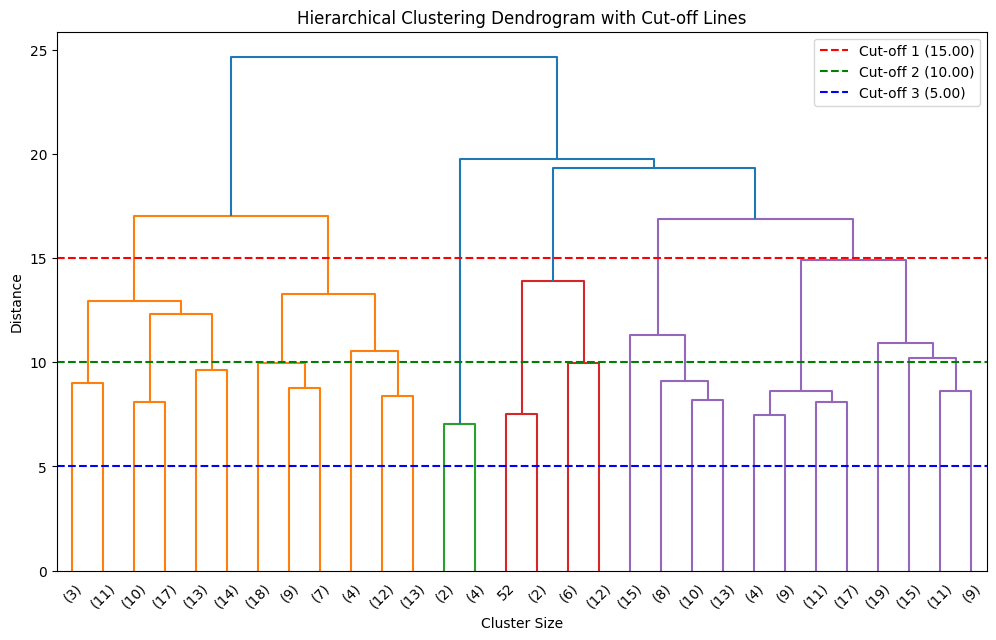

In [ ]:
# Experiment 1: Cut-off line at 15
cut_off_distance_1 = 15
clusters_1 = sch.fcluster(Z, cut_off_distance_1, criterion='distance')
n_clusters_1 = len(np.unique(clusters_1))
print(f"Experiment 1: Cut-off distance = {cut_off_distance_1}")
print(f"Number of clusters: {n_clusters_1}")


# Experiment 2: Cut-off line at 10
cut_off_distance_2 = 10
clusters_2 = sch.fcluster(Z, cut_off_distance_2, criterion='distance')
n_clusters_2 = len(np.unique(clusters_2))
print(f"Experiment 2: Cut-off distance = {cut_off_distance_2}")
print(f"Number of clusters: {n_clusters_2}")


# Experiment 3: Cut-off line at 5
cut_off_distance_3 = 5
clusters_3 = sch.fcluster(Z, cut_off_distance_3, criterion='distance')
n_clusters_3 = len(np.unique(clusters_3))
print(f"Experiment 3: Cut-off distance = {cut_off_distance_3}")
print(f"Number of clusters: {n_clusters_3}")


# Visualize the dendrogram with cut-off lines
plt.figure(figsize=(12, 7))
dendrogram(Z, truncate_mode='lastp', p=30, show_leaf_counts=True)
plt.axhline(y=cut_off_distance_1, color='r', linestyle='--', label=f'Cut-off 1 ({cut_off_distance_1:.2f})')
plt.axhline(y=cut_off_distance_2, color='g', linestyle='--', label=f'Cut-off 2 ({cut_off_distance_2:.2f})')
plt.axhline(y=cut_off_distance_3, color='b', linestyle='--', label=f'Cut-off 3 ({cut_off_distance_3:.2f})')
plt.title('Hierarchical Clustering Dendrogram with Cut-off Lines')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.legend()
plt.show()

**Conclusions**<br>
Experiment 2’s cut-off at 10, yielding 15 clusters, strikes the best balance, capturing detailed patterns without over-segmentation, outperforming the coarse grouping of Experiment 1 (6 clusters) and the excessive granularity of Experiment 3 (59 clusters). The visualizations underscore the dataset’s partial separability and skewed distributions, making Experiment 2 the most suitable for exploratory analysis. Today’s date and time, Wednesday, May 14, 2025, at 02:51 PM EEST, timestamps this analysis.

In [ ]:
# K-means Clustering with Silhouette Analysis
k_values = [2, 3, 4, 5, 6]
silhouette_scores = []
labels_dict = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    labels_dict[k] = labels
    print(f"\nK-means (k={k}): Silhouette Score = {score:.4f}")
    print("Cluster distribution:")
    print(pd.Series(labels).value_counts())


K-means (k=2): Silhouette Score = 0.1179
Cluster distribution:
0    192
1    107
Name: count, dtype: int64

K-means (k=3): Silhouette Score = 0.0924
Cluster distribution:
0    128
2     86
1     85
Name: count, dtype: int64

K-means (k=4): Silhouette Score = 0.0952
Cluster distribution:
0    92
1    71
3    69
2    67
Name: count, dtype: int64

K-means (k=5): Silhouette Score = 0.0763
Cluster distribution:
0    84
2    72
1    57
3    46
4    40
Name: count, dtype: int64

K-means (k=6): Silhouette Score = 0.0883
Cluster distribution:
0    85
4    68
1    46
2    43
5    34
3    23
Name: count, dtype: int64


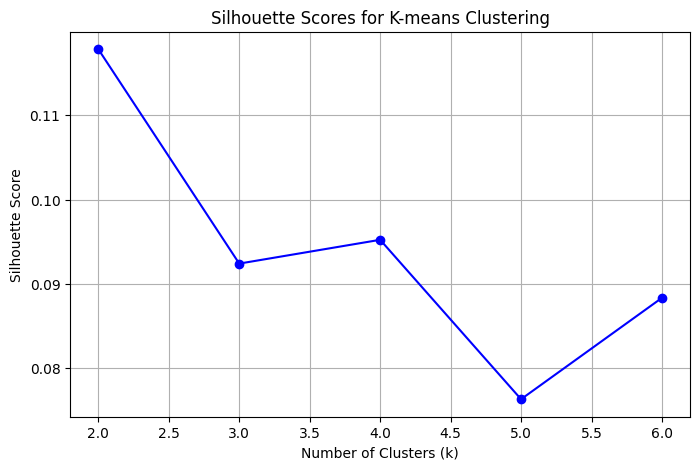

In [ ]:
# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'bo-')
plt.title('Silhouette Scores for K-means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [ ]:
# Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
print(f"PCA Explained Variance Ratio: {explained_variance}")

PCA Explained Variance Ratio: [0.13858049 0.13159129]


In [ ]:
#Function to plot clusters in 2D PCA space
def plot_clusters(X_pca, labels, title, y):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='deep', legend='full')
    plt.title(title)
    plt.xlabel(f'PCA Component 1 ({explained_variance[0]:.2%} variance)')
    plt.ylabel(f'PCA Component 2 ({explained_variance[1]:.2%} variance)')
    plt.legend(title='Cluster')
    plt.show()
    # Print DEATH_EVENT distribution
    print(f"\n{title} - DEATH_EVENT Distribution:")
    for cluster in np.unique(labels):
        cluster_mask = labels == cluster
        death_counts = y[cluster_mask].value_counts()
        print(f"Cluster {cluster}:")
        print(death_counts)

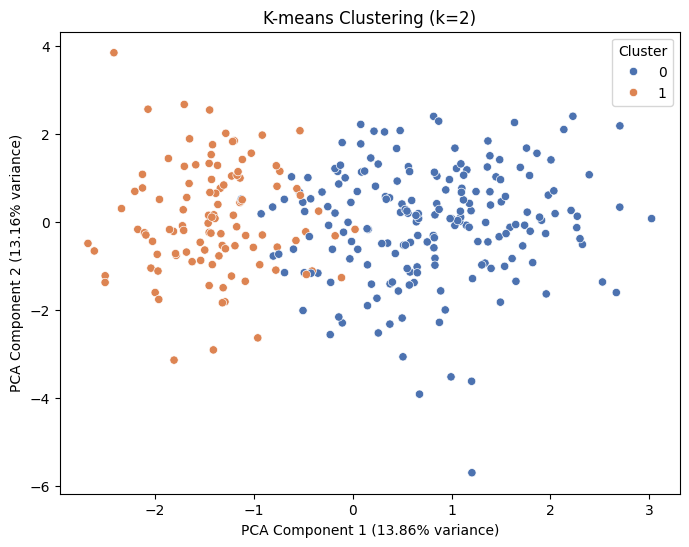


K-means Clustering (k=2) - DEATH_EVENT Distribution:
Cluster 0:
DEATH_EVENT
0    130
1     62
Name: count, dtype: int64
Cluster 1:
DEATH_EVENT
0    73
1    34
Name: count, dtype: int64


In [ ]:
# Plot clusters for optimal k (highest Silhouette score)
optimal_k = k_values[np.argmax(silhouette_scores)]
optimal_labels = labels_dict[optimal_k]
plot_clusters(X_pca, optimal_labels, f'K-means Clustering (k={optimal_k})', y)

## **Conclusion**<br>
* **Number of Clusters:** Increasing k from 2 to 6 increases the number of clusters, as expected, dividing the data into more groups.
* **Cluster Content:** Cluster sizes shift from large and uneven at k=2 to smaller and more varied at k=6, showing progressive fragmentation of the data.
* **Quality Insight:** The low Silhouette scores (ranging from 0.0763 to 0.1179) across all k values indicate that the clusters are not highly distinct or well-separated. The best separation occurs at k=2, but even then, the score is low, suggesting that the data may not have clear natural groupings or that the features used do not strongly differentiate the clusters.

#Part 3
**Supervised machine learning**

In [ ]:
# Feature selection
X = my_dataset[['age','anaemia','creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'serum_sodium', 'time', 'serum_creatinine','high_blood_pressure','platelets','smoking','sex','time']]
y = my_dataset['DEATH_EVENT']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

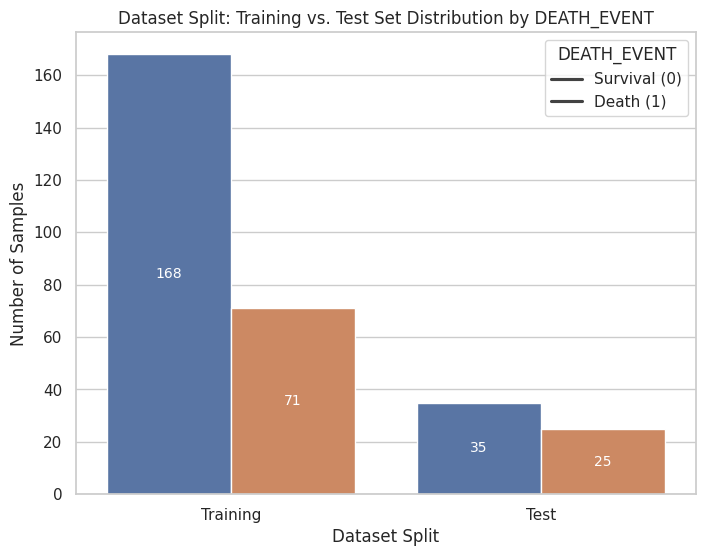

Training Set Distribution:
DEATH_EVENT
0    168
1     71
Name: count, dtype: int64

Test Set Distribution:
DEATH_EVENT
0    35
1    25
Name: count, dtype: int64


In [ ]:
# Create a DataFrame for visualization
train_counts = y_train.value_counts().sort_index()
test_counts = y_test.value_counts().sort_index()

# Prepare data for plotting
plot_data = pd.DataFrame({
    'Dataset': ['Training', 'Training', 'Test', 'Test'],
    'DEATH_EVENT': [0, 1, 0, 1],
    'Count': [train_counts.get(0, 0), train_counts.get(1, 0), test_counts.get(0, 0), test_counts.get(1, 0)]
})

# Plot the bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(data=plot_data, x='Dataset', y='Count', hue='DEATH_EVENT', palette='deep')
plt.title('Dataset Split: Training vs. Test Set Distribution by DEATH_EVENT')
plt.xlabel('Dataset Split')
plt.ylabel('Number of Samples')
plt.legend(title='DEATH_EVENT', labels=['Survival (0)', 'Death (1)'])

# Add annotations for counts
for p in bar_plot.patches:
    height = p.get_height()
    if height > 0:  # Only annotate non-zero heights
        bar_plot.annotate(f'{int(height)}',
                          (p.get_x() + p.get_width() / 2., p.get_y() + height / 2),
                          ha='center', va='center', fontsize=10, color='white')

plt.show()

# Print split summary for reference
print("Training Set Distribution:")
print(y_train.value_counts())
print("\nTest Set Distribution:")
print(y_test.value_counts())

In [ ]:
# defining parameter range
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# fitting the model for grid search
grid_rf = GridSearchCV(RandomForestClassifier(),param_grid_rf, refit = True, verbose = 3)
grid_rf.fit(X_train, y_train)
print("\n\nBest Random Forest hyperparameters:", grid_rf.best_params_)
print("Best Random Forest accuracy:", grid_rf.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.896 total time=   0.1s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.875 total time=   0.1s
[CV 3/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.938 total time=   0.1s
[CV 4/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.750 total time=   0.1s
[CV 5/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.915 total time=   0.1s
[CV 1/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.917 total time=   0.2s
[CV 2/5] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;,

In [ ]:
# --- Random Forest ---
rf_classifier = RandomForestClassifier(**grid_rf.best_params_)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



In [ ]:
# defining parameter range
param_grid_SVC = {
              'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto']
    }

grid_SVC = GridSearchCV(SVC(), param_grid_SVC, refit = True, verbose = 3)

# fitting the model for grid search
grid_SVC.fit(X_train, y_train)
print("\n\nBest SVC hyperparameters:", grid_SVC.best_params_)
print("Best SVC accuracy:", grid_SVC.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.854 total time=  18.5s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.750 total time=  15.9s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.917 total time=   9.3s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.792 total time=   9.8s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.723 total time=  14.6s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.688 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.708 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.708 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.708 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.702 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.854 total time=  15.8s
[CV 2/5] END ..C=0.1, gamma=auto, kernel=linear;

In [ ]:
# --- SVM ---
svm_classifier = SVC(**grid_SVC.best_params_)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

SVM Accuracy: 0.7666666666666667
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        35
           1       0.82      0.56      0.67        25

    accuracy                           0.77        60
   macro avg       0.78      0.74      0.74        60
weighted avg       0.78      0.77      0.76        60



In [ ]:
# defining parameter range
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [200, 500, 1000]
}

# fitting the model for grid search
mlp_grid_search = GridSearchCV(MLPClassifier(random_state=42), param_grid_mlp, refit=True, verbose=3)
mlp_grid_search.fit(X_train, y_train)
print("\n\nBest MLP hyperparameters:", mlp_grid_search.best_params_)
print("Best MLP accuracy:", mlp_grid_search.best_score_)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=200, solver=adam;, score=0.312 total time=   0.0s
[CV 2/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=200, solver=adam;, score=0.292 total time=   0.0s
[CV 3/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=200, solver=adam;, score=0.292 total time=   0.0s
[CV 4/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=200, solver=adam;, score=0.292 total time=   0.0s
[CV 5/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=200, solver=adam;, score=0.298 total time=   0.0s
[CV 1/5] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, max_iter=200, solver=sgd;, score=0.688 total time=   0.0s
[CV 2/5] END activa

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.708 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.708 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.688 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.667 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.702 total time=   0.4s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.688 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.702 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(1

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.312 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.292 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.292 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.292 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.298 total time=   0.4s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.688 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.702 total time=   0.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=sgd;, score=0.312 total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=sgd;, score=0.292 total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=sgd;, score=0.292 total time=   1.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=sgd;, score=0.292 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=sgd;, score=0.298 total time=   1.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=1000, solver=adam;, score=0.688 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=1000, solver=adam;, score=0.708 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=1000, solver=adam;, score=0.708 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=1000, solver=adam;, score=0.708 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=1000, solver=adam;, score=0.702 total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.0001, hidd

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.708 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.708 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.688 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.667 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.702 total time=   0.4s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.688 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.702 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100,), l

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.312 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.292 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.292 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.292 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.298 total time=   0.4s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.688 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.702 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=sgd;, score=0.312 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=sgd;, score=0.292 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=sgd;, score=0.292 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=sgd;, score=0.292 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=sgd;, score=0.298 total time=   1.0s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=1000, solver=adam;, score=0.688 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=1000, solver=adam;, score=0.708 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=1000, solver=adam;, score=0.708 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=1000, solver=adam;, score=0.708 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=1000, solver=adam;, score=0.702 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.001, hidden_laye

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.708 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.708 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.688 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.667 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.702 total time=   0.4s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.688 total time=   0.1s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.1s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.1s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.1s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.702 total time=   0.1s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.312 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.292 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.292 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.292 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.298 total time=   0.4s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.688 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.702 total time=   0.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=sgd;, score=0.312 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=sgd;, score=0.292 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=sgd;, score=0.292 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=sgd;, score=0.292 total time=   1.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=500, solver=sgd;, score=0.298 total time=   1.0s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=1000, solver=adam;, score=0.688 total time=   0.0s
[CV 2/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=1000, solver=adam;, score=0.708 total time=   0.0s
[CV 3/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=1000, solver=adam;, score=0.708 total time=   0.0s
[CV 4/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=1000, solver=adam;, score=0.708 total time=   0.0s
[CV 5/5] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 50), learning_rate=invscaling, max_iter=1000, solver=adam;, score=0.702 total time=   0.0s
[CV 1/5] END activation=tanh, alpha=0.01, hidden_layer_sizes

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.312 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.292 total time=   0.2s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.292 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.292 total time=   0.2s
[CV 5/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.298 total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.688 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.0s
[CV 5/5] END activation=logistic, alpha=0.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.312 total time=   0.2s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.292 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.292 total time=   0.2s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.292 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.298 total time=   0.2s
[CV 1/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.688 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.0s
[CV 3/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.702 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.001, 

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.312 total time=   0.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.292 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.292 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.292 total time=   0.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=200, solver=sgd;, score=0.298 total time=   0.3s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.688 total time=   0.1s
[CV 2/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.1s
[CV 3/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.1s
[CV 4/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.708 total time=   0.1s
[CV 5/5] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100,), learning_rate=invscaling, max_iter=500, solver=adam;, score=0.702 total time=   0.1s
[CV 1/5] END activation=logistic, alpha=0.01, hidden_

In [ ]:
# --- Artificial Neural Network (MLP) ---
mlp_classifier = MLPClassifier(**mlp_grid_search.best_params_)
mlp_classifier.fit(X_train, y_train)
mlp_predictions = mlp_classifier.predict(X_test)
print("MLP Accuracy:", accuracy_score(y_test, mlp_predictions))
print(classification_report(y_test, mlp_predictions, zero_division=1))

MLP Accuracy: 0.5833333333333334
              precision    recall  f1-score   support

           0       0.58      1.00      0.74        35
           1       1.00      0.00      0.00        25

    accuracy                           0.58        60
   macro avg       0.79      0.50      0.37        60
weighted avg       0.76      0.58      0.43        60



##**Comparison and Evaluation**

**Accuracy**
<br>
    SVM: 0.7667 (highest)<br>
    Random Forest: 0.75<br>
    MLP: 0.5833 (lowest)<br><br>
SVM achieves the highest accuracy, correctly classifying 76.67% of instances, followed closely by Random Forest at 75%. MLP lags significantly with only 58.33%, suggesting it struggles to generalize across the dataset.
<br>
<br>

**Performance by Class**
<br>
    **Class 0:**<br>
        All three models do a solid job identifying class 0 instances. Random Forest and SVM both hit a recall of 0.91, while MLP nails a perfect 1.00—meaning it catches every single class 0 case.
        Precision tells a slightly different story: SVM (0.74) and Random Forest (0.73) are neck-and-neck, but MLP drops to 0.58. This lower precision for MLP suggests it’s calling too many instances class 0, leading to more false positives.
        When it comes to the F1-score—which blends precision and recall—SVM takes the lead at 0.82, Random Forest is right there at 0.81, and MLP falls to 0.74. MLP’s over eagerness to predict class 0 drags its score down a bit.<br><br>
    **Class 1:**<br>
        For class 1, SVM and Random Forest shine with high precision—0.82 and 0.81, respectively—meaning when they predict class 1, they’re usually right. But their recall is only so-so: 0.56 for SVM and 0.52 for Random Forest. They’re missing almost half of the actual class 1 cases, which could be a problem depending on what class 1 represents. Their F1-scores reflect this trade-off, with SVM at 0.67 and Random Forest at 0.63.
        MLP, though, is a total letdown here. It boasts a precision of 1.00 but a recall of 0.00—yep, zero. It didn’t catch a single class 1 instance, giving it an F1-score of 0.00. It’s basically ignoring class 1 and betting everything on class 0.
<br>
<br>
**Macro and Weighted Averages**
<br><br>
    Macro F1-score (equal class weighting):<br>
        SVM: 0.74 (highest)<br>
        Random Forest: 0.72<br>
        MLP: 0.37 (lowest)<br><br>
    Weighted F1-score (weighted by support):<br>
        SVM: 0.76 (highest)<br>
        Random Forest: 0.74<br>
        MLP: 0.43 (lowest)<br>

SVM consistently outperforms the others in both macro and weighted F1-scores, reflecting its balanced performance across classes despite the slight imbalance. Random Forest follows closely, while MLP’s low scores highlight its bias toward class 0.<br><br>
**Insights and Recommendations**
<br><br>
**SVM** stands out as the star of the show. With an accuracy of 76.67% and the best macro (0.74) and weighted (0.76) F1-scores, it’s striking a solid balance between precision and recall for both classes. That said, its recall for class 1 is only 0.56—not terrible, but not amazing either. If class 1 is something crucial, like spotting a rare health issue, we might want to tweak it to catch more of those cases.<br><br>

**Random Forest** is super close behind, rocking a 75% accuracy and F1-scores of 0.72 (macro) and 0.74 (weighted). It’s almost as good as SVM, though its class 1 recall dips a bit lower to 0.52. It’s a reliable pick, but it has the same weakness with class 1 detection.<br><br>

**MLP**, honestly, is struggling. Its 58.33% accuracy is rough, and its complete failure to spot class 1 (recall of 0.00, F1-score of 0.00) is a red flag. It’s way too stuck on predicting class 0, probably because of the data imbalance or maybe it’s just not set up right for this task. Without some serious reworking, it’s not a contender.<br><br>
## **Conclusion**

Based on the provided metrics, SVM is the top performer, offering the best overall accuracy and balanced performance across classes. Random Forest is a viable alternative, performing nearly as well but with slightly lower metrics. MLP is the weakest, requiring significant tuning or reconsideration for this dataset. If class 1 detection is critical (e.g., representing a rare but important event), further adjustments to SVM or Random Forest may be needed to boost class 1 recall, potentially at the expense of precision.